# Introduction to OpenCV

## Getting started

First we need to import the relevant libraries: OpenCV itself, Numpy, and a couple of others. Common and Video are simple data handling and opening routines that you can find in the OpenCV Python Samples directory or from the github repo linked above.  

In [27]:
# These imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (5, 5) # this controls figure size in the notebook



Now we can open an image:

In [28]:
input_image=cv2.imread('noidea.jpg')

We can find out various things about that image

In [29]:
print(input_image.size)

776250


In [30]:
print(input_image.shape)



(414, 625, 3)


In [31]:
print(input_image.dtype)

uint8


**gotcha** that last one (datatype) is one of the tricky things about working in Python. As it's not strongly typed, Python will allow you to have arrays of different types but the same size, and some functions will return arrays of types that you probably don't want. Being able to check and inspect the datatype like this is very useful and is one of the things I often find myself doing in debugging.

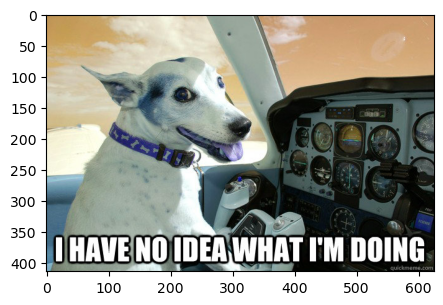

In [32]:
plt.imshow(input_image)

What this illustrates is something key about OpenCV: it doesn't store images in RGB format, but in BGR format.

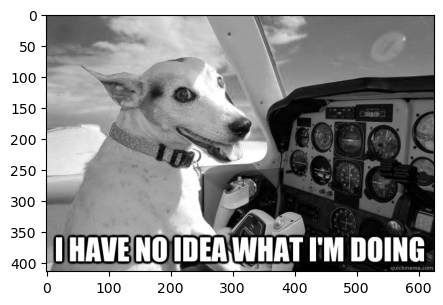

In [49]:
# split channels
b,g,r=cv2.split(input_image)
# show one of the channels (this is red - see that the sky is kind of dark. try changing it to b)
plt.imshow(r, cmap='gray')


## converting between colour spaces, merging and splitting channels

We can convert between various colourspaces in OpenCV easily. We've seen how to split, above. We can also merge channels:

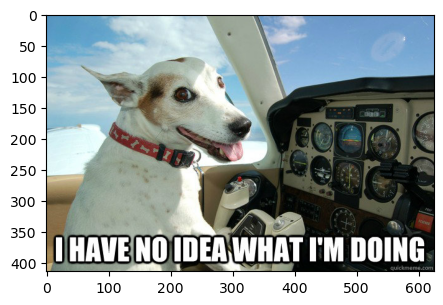

In [34]:
merged=cv2.merge([r,g,b])
# merge takes an array of single channel matrices
plt.imshow(merged)


OpenCV also has a function specifically for dealing with image colorspaces, so rather than split and merge channels by hand you can use this instead. It is usually marginally faster...

There are something like 250 color related flags in OpenCV for conversion and display. The ones you are most likely to use are COLOR_BGR2RGB for RGB conversion, COLOR_BGR2GRAY for conversion to greyscale, and COLOR_BGR2HSV for conversion to Hue,Saturation,Value colour space. [http://docs.opencv.org/trunk/de/d25/imgproc_color_conversions.html] has more information on how these colour conversions are done.

In [44]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print(len(COLORflags))

# If you want to see them all, rather than just a count uncomment the following line
# print(COLORflags)

296


In [75]:
from PIL import Image
import matplotlib.pyplot as plt

def plot_images(images, titles=None, figsize=(10, 6), cmap="gray"):
    if titles is None:
        titles = " " * len(images)
    fig, axes = plt.subplots(len(images), 1, figsize=figsize)

    for i, (image, title) in enumerate(zip(images, titles)):
        axes[i].imshow(image, cmap)
        axes[i].axis('off')
        axes[i].set_title(title)

    plt.tight_layout()
    plt.show()

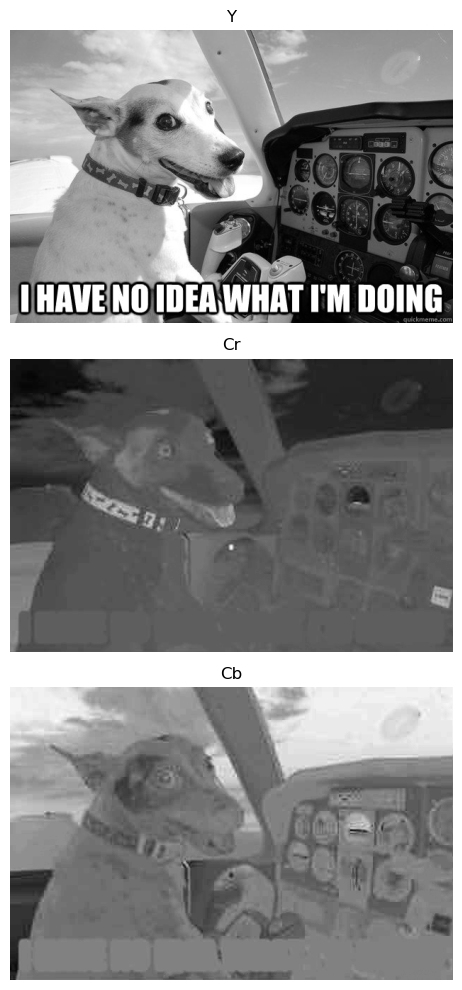

In [76]:
hsv_image=cv2.cvtColor(input_image, cv2.COLOR_BGR2YCrCb)
x, y, z =cv2.split(hsv_image)
plot_images([x, y, z], ["Y", "Cr", "Cb"], (10, 10))

## Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimised for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

In [37]:
pixel = input_image[100,100]
print(pixel)

[150 161 153]


In [38]:
input_image[100,100] = [0,0,0]
pixelnew = input_image[100,100]
print(pixelnew)

[0 0 0]


## Getting and setting regions of an image

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to get a region of interest to work on.

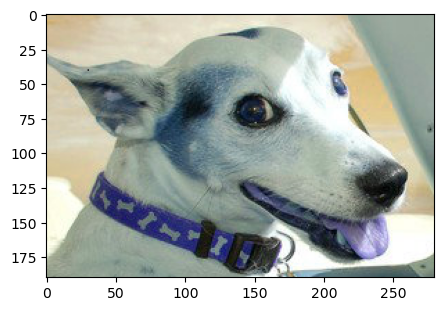

In [63]:
dogface = input_image[60:250, 70:350]
plt.imshow(dogface)

190
280


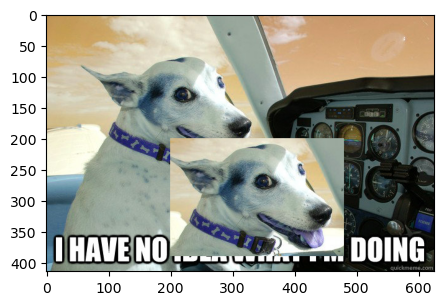

In [64]:
fresh_image=cv2.imread('noidea.jpg') # it's either start with a fresh read of the image,
                                  # or end up with dogfaces on dogfaces on dogfaces
                                   # as you re-run parts of the notebook but not others...

fresh_image[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface
print(dogface.shape[0])
print(dogface.shape[1])
plt.imshow(fresh_image)

## Matrix slicing
In OpenCV python style, as I have mentioned, images are numpy arrays. 

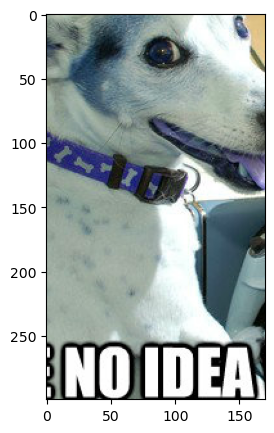

In [41]:
freshim2 = cv2.imread("noidea.jpg")
crop = freshim2[100:400, 130:300]
plt.imshow(crop)

The key thing to note here is that the slicing works like
```
[top_y:bottom_y, left_x:right_x]
```
This can also be thought of as
```
[y:y+height, x:x+width]
```

You can also use slicing to separate out channels.  In this case you want
```
[y:y+height, x:x+width, channel]
```
where channel represents the colour you're interested in - this could be 0 = blue, 1 = green or 2=red if you're dealing with a default OpenCV image, but if you've got an image that has been converted it could be something else. Here's an example that converts to HSV then selects the S (Saturation) channel of the same crop above:

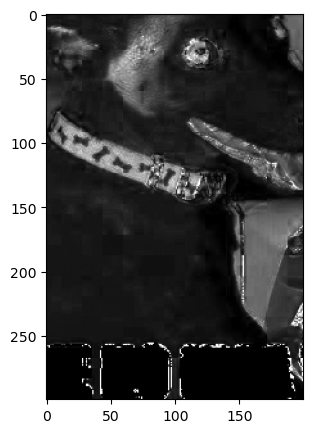

In [42]:
hsvim=cv2.cvtColor(freshim2,cv2.COLOR_BGR2HSV)
bcrop =hsvim[100:400, 100:300, 1]
plt.imshow(bcrop, cmap="gray")

## Image stats and image processing

### Basic manipulations

Rotate, flip...

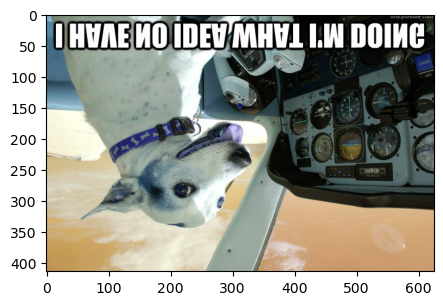

In [65]:
flipped_code_0=cv2.flip(input_image,0) # vertical flip
plt.imshow(flipped_code_0)

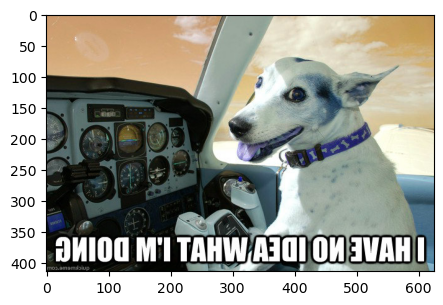

In [66]:
flipped_code_1=cv2.flip(input_image,1) # horizontal flip
plt.imshow(flipped_code_1)

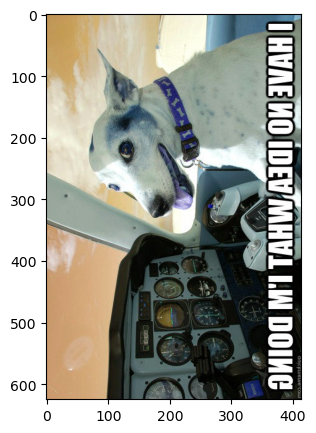

In [67]:
transposed=cv2.transpose(input_image)
plt.imshow(transposed)

### Minimum, maximum

To find the min or max of a matrix, you can use minMaxLoc. This takes a single channel image (it doesn't make much sense to take the max of a 3 channel image). So in the next code snippet you see a for loop, using python style image slicing, to look at each channel of the input image separately.

In [68]:
for i in range(0,3):
    min_value, max_value, min_location, max_location=cv2.minMaxLoc(input_image[:,:,i])
    print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))


min 0.0 is at (100, 100), and max 255.0 is at (577, 37)
min 0.0 is at (100, 100), and max 255.0 is at (257, 81)
min 0.0 is at (100, 100), and max 255.0 is at (257, 81)


### Arithmetic operations on images

OpenCV has a lot of functions for doing mathematics on images. Some of these have "analogous" numpy alternatives, but it is nearly always better to use the OpenCV version. The reason for this that OpenCV is designed to work on images and so handles overflow better (OpenCV add, for example, truncates to 255 if the datatype is image-like and 8 bit; Numpy's alternative wraps around).

Useful arithmetic operations include add and addWeighted, which combine two images that are the same size.

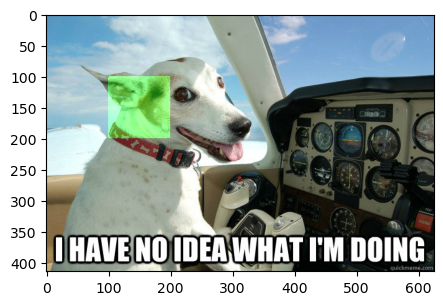

In [69]:
#First create an image the same size as our input
blank_image = np.zeros((input_image.shape), np.uint8)

blank_image[100:200,100:200,1]=100; #give it a green square

new_image=cv2.add(blank_image,input_image) # add the two images together

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

### Noise reduction
Noise reduction usually involves blurring/smoothing an image using a Gaussian kernel.
The width of the kernel determines the amount of smoothing.

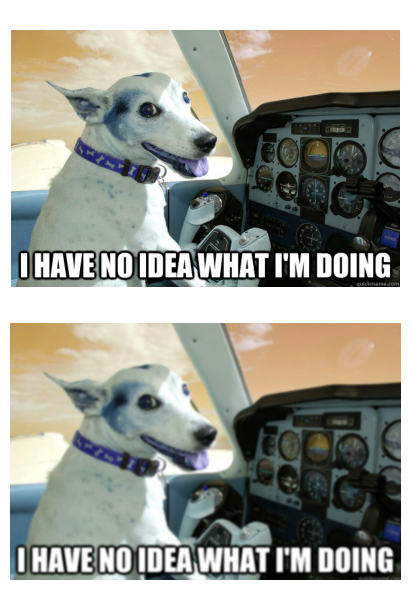

In [78]:
d=3
img_blur3 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
plot_images([input_image, img_blur3])

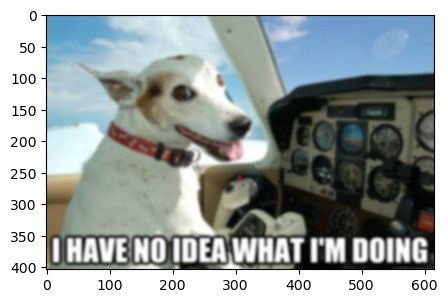

In [79]:
d=5
img_blur5 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur5, cv2.COLOR_BGR2RGB))

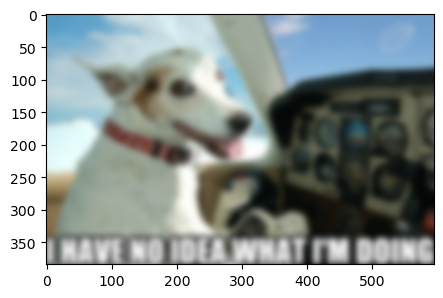

In [72]:
d=15
img_blur15 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur15, cv2.COLOR_BGR2RGB))

### Edges

For a lot of what we think of as "modern" computer vision techniques, edge detection functions as a building block. Much edge detection actually works by **convolution**, and indeed **convolutional neural networks** are absolutely the flavour of the month in some parts of computer vision. Sobel's edge detector was one of the first truly successful edge detection (enhancement) technique and that involves convolution at its core. 

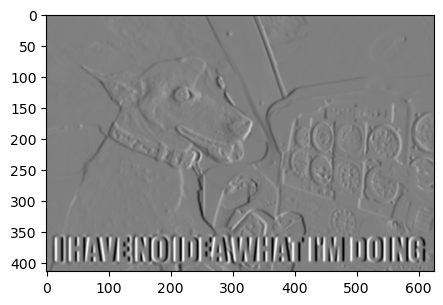

In [73]:
sobelimage=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(sobelimage,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(sobelimage,cv2.CV_64F,0,1,ksize=9)
plt.imshow(sobelx,cmap = 'gray')
# Sobel works in x and in y, change sobelx to sobely in the olt line above to see the difference


Canny edge detection is another winnning technique - it takes two thresholds.
The first one determines how likely Canny is to find an edge, and the second determines how likely it is to follow that edge once it's found. Investigate the effect of these thresholds by altering the values below.

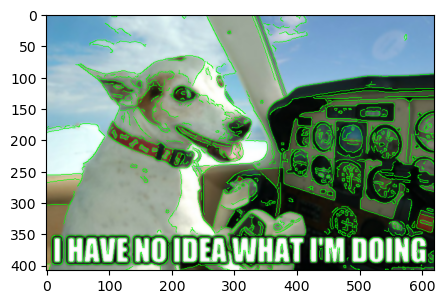

In [74]:
th1=30
th2=60 # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...
d=3 # gaussian blur

edgeresult=input_image.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray, th1, th2)

edgeresult[edge != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green

plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))

## Features in computer vision

Features are image locations that are "easy" to find in the future.  Indeed, one of the early feature detection techniques Lucas-Kanade, sometimes called Kanade-Lucas-Tomasi or KLT features come from a seminal paper called "Good features to track".

Edges find brightness discontinuities in an image, features find distinctive regions. There are a bunch of different feature detectors and these all have some characteristics in common: they should be quick to find, and things that are close in image-space are close in feature-space (that is, the feature representation of an object looks like the feature representation of objects that look like that object).

### Corner detectors
If you think of edges as being lines, then corners are an obvious choice for features as they represent the intersection of two lines. One of the earlier corner detectors was introduced by Harris, and it is still a very effective corner detector that gets used quite a lot: it's reliable and it's fast.

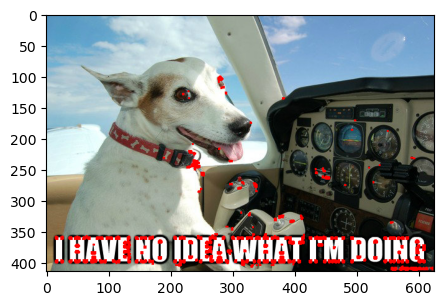

In [80]:
harris_test=input_image.copy()
#greyscale it
gray = cv2.cvtColor(harris_test,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small

# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold

#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_test[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(cv2.cvtColor(harris_test, cv2.COLOR_BGR2RGB))

## Moving towards feature space
When we consider modern feature detectors there are a few things we need to mention. What makes a good feature includes the following:

* Repeatability (got to be able to find it again)
* Distinctiveness/informativeness (features representing different things need to be different)
* Locality (they need to be local to the image feature and not, like, the whole image)
* Quantity (you need to be able to find enough of them for them to be properly useful)
* Accuracy (they need to accurately locate the image feature)
* Efficiency (they've got to be computable in reasonable time)

This comes from a good survey which you can find here (and which I'd thoroughly recommend reading if you're doing feature detection work) [here](https://www.slideshare.net/AhmedOne1/survey-1-project-overview)

**Note:** some of the very famous feature detectors (SIFT/SURF and so on) are around, but aren't in OpenCV by default due to patent issues. You can build them for OpenCV if you want - or you can find other implementations (David Lowe's SIFT implementation works just fine). Just google for instructions.  For the purposes of this tutorial (and to save time) we're only going to look at those which are actually in OpenCV.

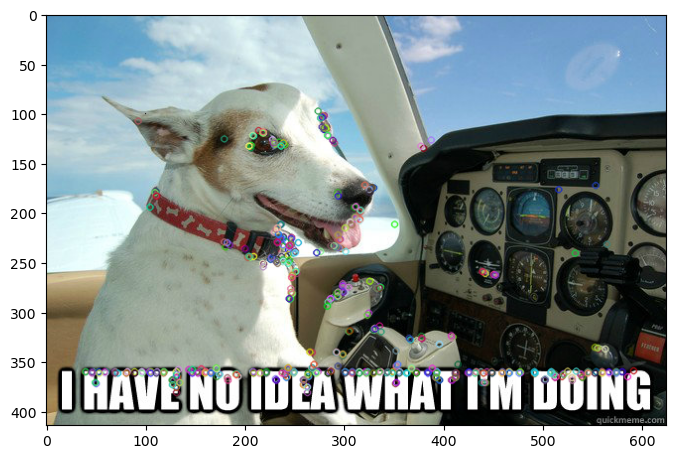

In [86]:
orbimg=input_image.copy()

orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(orbimg,None)
# compute the descriptors with ORB
kp, des = orb.compute(orbimg, kp)
# draw keypoints
cv2.drawKeypoints(orbimg,kp,orbimg)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(cv2.cvtColor(orbimg, cv2.COLOR_BGR2RGB))
plt.show()

## Matching features
Finding features is one thing but actually we want to use them for matching.
First let's get something where we know there's going to be a match


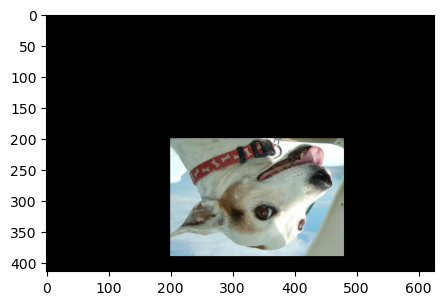

In [88]:
img2match=np.zeros(input_image.shape,np.uint8)
dogface=input_image[60:250, 70:350] # copy out a bit
img2match[60:250,70:350]=[0,0,0] # blank that region
dogface=cv2.flip(dogface,0) #flip the copy
img2match[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface # paste it back somewhere else

plt.imshow(cv2.cvtColor(img2match, cv2.COLOR_BGR2RGB))

## Matching keypoints

The feature matching function (in this case Orb) detects and then computes keypoint descriptors. These are a higher dimensional representation of the image region immediately around a point of interest (sometimes literally called "interest points").

These higher-dimensional representations can then be matched; the strength you gain from matching these descriptors rather than image regions directly is that they have a certain invariance to transformations (like rotation, or scaling). OpenCV providers matcher routines to do this, in which you can specify the distance measure to use.

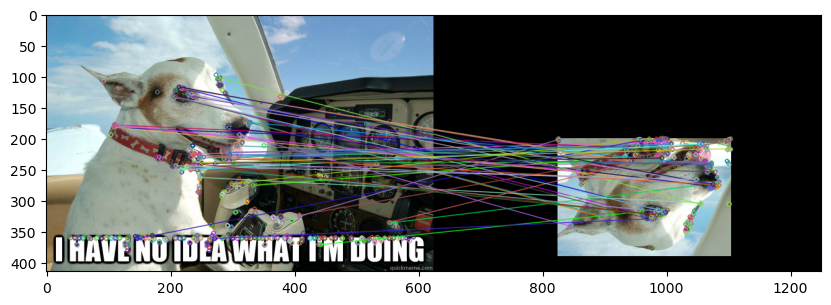

In [89]:

kp2 = orb.detect(img2match,None)
# compute the descriptors with ORB
kp2, des2 = orb.compute(img2match, kp2)
# create BFMatcher object: this is a Brute Force matching object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des,des2)

# Sort them by distance between matches in feature space - so the best matches are first.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 50 matches.
oimg = cv2.drawMatches(orbimg,kp,img2match,kp2,matches[:50], orbimg)

fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB))


As you can see there are some false matches, but it's fairly clear that most of the matched keypoints found are actual matches between image regions on the dogface.

To be more precise about our matching we could choose to enforce **homography** constraints, which looks for features than sit on the same plane. 